In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('forbes_billionaires.csv')
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True


In [3]:
df.shape

(2755, 12)

In [4]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2755 non-null   object 
 1   NetWorth     2755 non-null   float64
 2   Country      2755 non-null   object 
 3   Source       2755 non-null   object 
 4   Rank         2755 non-null   int64  
 5   Age          2630 non-null   float64
 6   Residence    2715 non-null   object 
 7   Citizenship  2739 non-null   object 
 8   Status       2090 non-null   object 
 9   Children     1552 non-null   float64
 10  Education    1409 non-null   object 
 11  Self_made    2737 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 258.4+ KB


In [5]:
df.isnull().sum()

Name              0
NetWorth          0
Country           0
Source            0
Rank              0
Age             125
Residence        40
Citizenship      16
Status          665
Children       1203
Education      1346
Self_made        18
dtype: int64

In [7]:
# Fill missing values with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Self_made'].fillna(df['Self_made'].mean(), inplace=True)

# Convert to integers
df['Age'] = df['Age'].astype(int)
df['Self_made'] = df['Self_made'].astype(int)


In [ ]:
# df['Residence'].fillna(df['Residence'].mean(), inplace=True)
# df['Citizenship'].fillna(df['Citizenship'].mean(), inplace=True)

In [8]:
df.head(2)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",1
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",1


In [ ]:
#df['Rank'].fillna(df['Rank'].mean(), inplace=True)

In [10]:
df['Children'].fillna(df['Children'].mean(), inplace=True)

In [11]:
df['Children'] = df['Children'].astype(int)

In [13]:
df.describe()

,NetWorth,Rank,Age,Children,Self_made
count,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000
mean,4.749220,1345.663521,63.255172,2.550998,0.711434
std,9.615358,772.669811,13.169826,1.307981,0.453178
min,1.000000,1.000000,18.000000,1.000000,0.000000
25%,1.500000,680.000000,54.000000,2.000000,0.000000
50%,2.300000,1362.000000,63.000000,2.000000,1.000000
75%,4.200000,2035.000000,72.000000,3.000000,1.000000
max,177.000000,2674.000000,99.000000,23.000000,1.000000


In [37]:
source.index

Index(['real estate', 'pharmaceuticals', 'investments', 'diversified',
       'software', 'retail', 'hedge funds', 'private equity', 'consumer goods',
       'chemicals'],
      dtype='object', name='Source')

In [41]:
source.value_counts

<bound method IndexOpsMixin.value_counts of Source
real estate        171
pharmaceuticals     99
investments         90
diversified         85
software            62
retail              47
hedge funds         42
private equity      35
consumer goods      32
chemicals           32
Name: count, dtype: int64>

### 1. Which sector has the most number of billionaires?

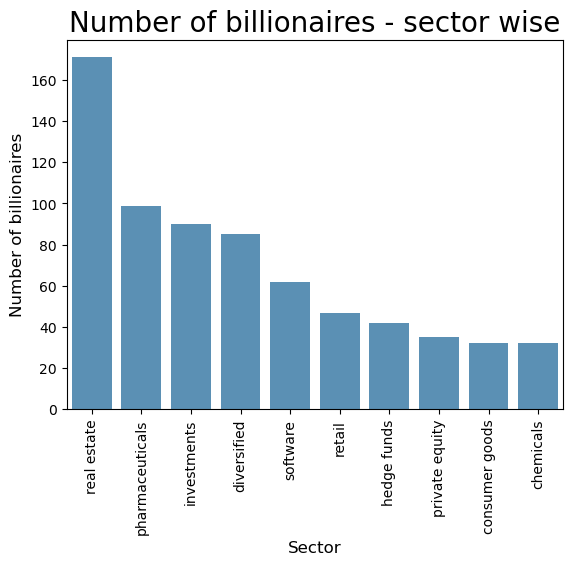

In [32]:
source = df['Source'].value_counts().head(10)
sns.barplot(x=source.index, y=source.values, alpha=0.8 , hue = None )
plt.title('Number of billionaires - sector wise', fontsize=20)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('Sector', fontsize=12)
plt.xticks(rotation = 90)
plt.show()


obervation : We do anaylsis of which Source Has most amount of billionaires and we got that:-
        **Real Estate** has most number of billionaires. 

### 2. Is a college degree required to become a billionaire?

In [34]:
df['Education'] = df['Education'].fillna('empty')
master = 0
bachelor = 0
phd = 0
drop_out = 0
others = 0
unknown = 0
for i in df['Education']:
  if 'Ph.D' in i or 'Doctorate' in i:
    phd += 1
  elif 'Master' in i or 'MBA' in i:
    master += 1
  elif 'Bachelor' in i:
    bachelor += 1
  elif 'Drop Out' in i:
    drop_out += 1
  elif i == 'empty':
    unknown += 1
  else:
    others += 1

bachelor_percent = bachelor/(bachelor+master+phd+drop_out+others)*100
master_percent = master/(bachelor+master+phd+drop_out+others)*100
phd_percent = phd/(bachelor+master+phd+drop_out+others)*100
dropout_percent = drop_out/(bachelor+master+phd+drop_out+others)*100
others_percent = others/(bachelor+master+phd+drop_out+others)*100

print(f'Around {round(bachelor_percent)}% of the billionaires have only done bachelors degree')
print(f'Around {round(master_percent)}% of the billionaires have done masters degree')
print(f'Around {round(phd_percent)}% of the billionaires have done PHD degree')
print(f'Around {round(dropout_percent)}% of the billionaires have dropped out of the college')


Around 47% of the billionaires have only done bachelors degree
Around 33% of the billionaires have done masters degree
Around 7% of the billionaires have done PHD degree
Around 5% of the billionaires have dropped out of the college


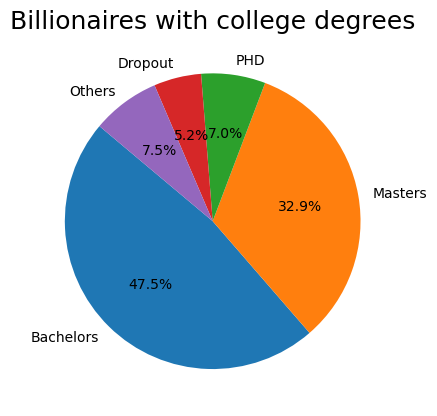

In [43]:
sizes = [bachelor_percent, master_percent, phd_percent, dropout_percent, others_percent]
plt.pie(sizes, labels=labels,autopct='%1.1f%%',startangle=140)
plt.title('Billionaires with college degrees', fontsize=18)
plt.show()

observation :- we found that highest amount of the Billionaires has **Bachelors degree** & second highest amount of the Billionaires has **Masters degree**

### 3. Where should one study to become a billionaire?

In [44]:
final_bachelor = {}
final_master = {}
for i in df['Education']:
  j = i.split(';')
  if len(j) == 1 and 'Bachelor' in j[0]:
    new = j[0].split(',')
    if new[-1] in final_bachelor:
      final_bachelor[new[-1]] += 1
    else:
      final_bachelor[new[-1]] = 1
  elif len(j) == 2 and 'Master' in j[0]:
    new = j[0].split(',')
    if new[-1] in final_master:
      final_master[new[-1]] += 1
    else:
      final_master[new[-1]] = 1
  elif len(j) == 2 and 'Master' in j[1]:
    new = j[1].split(',')
    if new[-1] in final_master:
      final_master[new[-1]] += 1
    else:
      final_master[new[-1]] = 1

sort_bachelor = dict(sorted(final_bachelor.items(),key=lambda x:x[1],reverse = True)[:10])
sort_master = dict(sorted(final_master.items(),key=lambda x:x[1],reverse = True)[:10])
print('No. of billionaires who have done Bachelors at:', sort_bachelor)
print('No. of billionaires who have done Masters at:', sort_master)

No. of billionaires who have done Bachelors at: {' Stanford University': 18, ' Harvard University': 13, ' The Wharton School': 9, ' Yale University': 9, ' University of Southern California': 9, ' Bombay University': 7, ' University of Washington': 6, ' Delhi University': 6, ' Cornell University': 6, ' Sichuan University': 5}
No. of billionaires who have done Masters at: {' Harvard Business School': 22, ' Harvard University': 22, ' Stanford Graduate School of Business': 16, ' Stanford University': 13, ' Columbia Business School': 11, ' The Wharton School': 8, ' Massachusetts Institute of Technology': 7, ' Columbia University': 6, ' Leonard N. Stern School of Business': 6, ' Tsinghua University': 4}


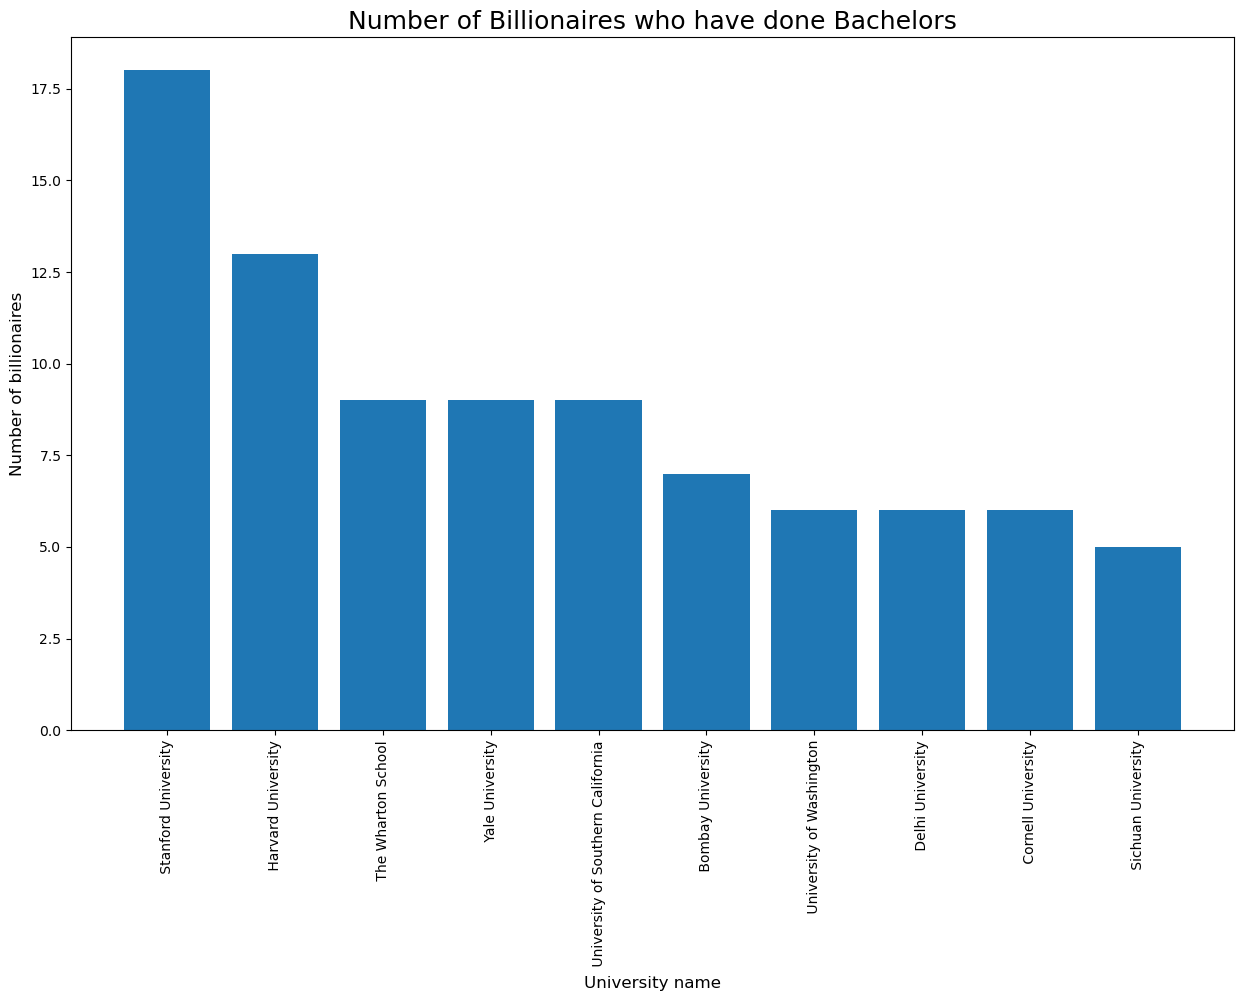

In [47]:
plt.figure(figsize=(15,9))
plt.bar(*zip(*sort_bachelor.items()))
plt.title('Number of Billionaires who have done Bachelors', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('University name', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Observation :- We found that most Billionaires has Bachelor Degree belongs from **Stanford University** 

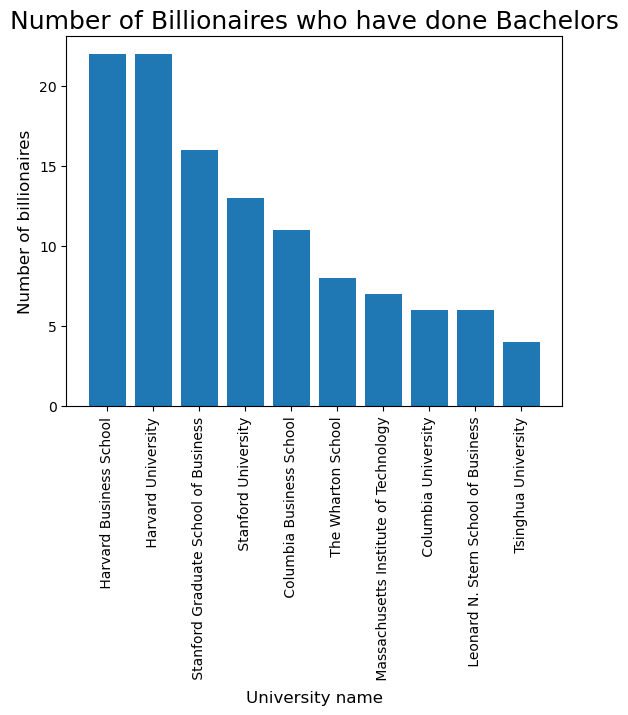

In [56]:
plt.bar(*zip(*sort_master.items()))
plt.title('Number of Billionaires who have done Bachelors', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('University name', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Observation :- We found that most Billionaires has Master's Degree belongs from **Harvard University & Harvard Business School**

**Conclusion** :- To Become Billionaire one should do Bachelors from Standford University or one should do Masters from Harvard university

### 4. Number of Billionaries - Age wise:

In [57]:
age = {'n0s':0, '10s':0, '20s':0, '30s':0, '40s':0, '50s':0, '60s':0, '70s':0, '80s':0, '90s':0, 'above':0}
for i in df['Age']:
  age[str(i)[0] + '0s'] += 1

for key,value in age.items():
  if key == 'n0s' or key == 'above':
    pass
  else:
    print(f'Number of billionaires who are in their {key}:',value)

Number of billionaires who are in their 10s: 1
Number of billionaires who are in their 20s: 9
Number of billionaires who are in their 30s: 94
Number of billionaires who are in their 40s: 291
Number of billionaires who are in their 50s: 729
Number of billionaires who are in their 60s: 756
Number of billionaires who are in their 70s: 547
Number of billionaires who are in their 80s: 258
Number of billionaires who are in their 90s: 70


In [ ]:
age1 = age
del age1['n0s'] # deleting below 10 age group
del age1['above'] # deleting Above 90 age group

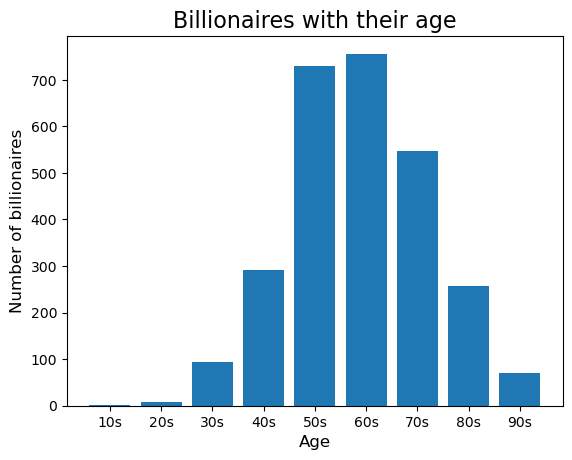

In [69]:
plt.bar(*zip(*age1.items()))
plt.title('Billionaires with their age', fontsize=16)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

**observation** :- The **highest age** group of the Billionaires is in their **60s**.(Number of billionaires who are in their 60s: 756).
     The **Second highest age** group of the Billionaires is in their **50s**.(Number of billionaires who are in their 50s: 729)

### 5. Number of Self made billionaries?

In [70]:
print("Number of billionaires who are self made: ",df['Self_made'].sum())
print("Number of billionaires who are not self made: ",len(df['Self_made']) - df['Self_made'].sum())

Number of billionaires who are self made:  1960
Number of billionaires who are not self made:  795


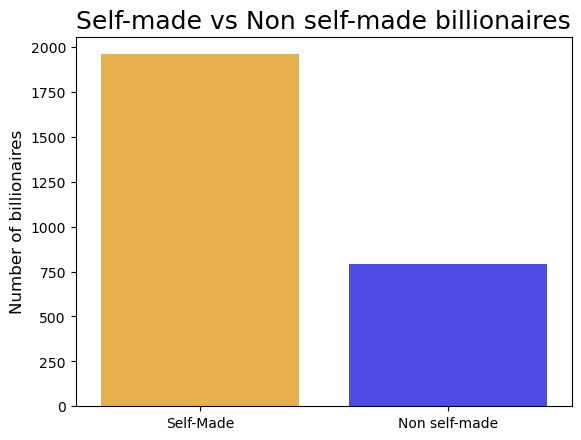

In [74]:
colors = ["orange", "blue"]
sns.barplot(x=['Self-Made', 'Non self-made'], 
            y=[df['Self_made'].sum(), len(df) - df['Self_made'].sum()], 
            alpha=0.8,
            palette=colors)  # Set the color palette
plt.title('Self-made vs Non self-made billionaires', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.show()


Observation :- Number of Billionaires are **Self - Made**

### 6. Where do younger billionaires live?

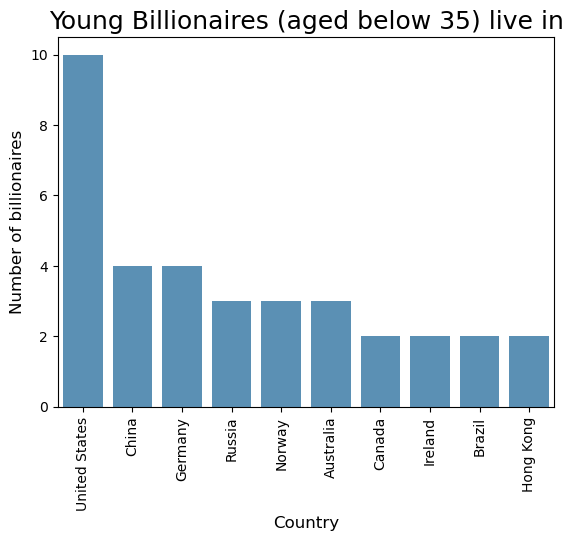

In [78]:
df1 = df[df['Age']<=35] # Creating new Dataframe called df1 showing the age is less than or Equal to 35 are the youger billionaires
young = df1['Country'].value_counts().head(10) #Top 10 Country Counts
sns.barplot(x=young.index, y=young.values, alpha=0.8)
plt.title('Young Billionaires (aged below 35) live in', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation = 90)
plt.show()

Observation:- Highest Number of Billionaire lives in United States(U.S)

### 7. Number of billionaires in each relationship category

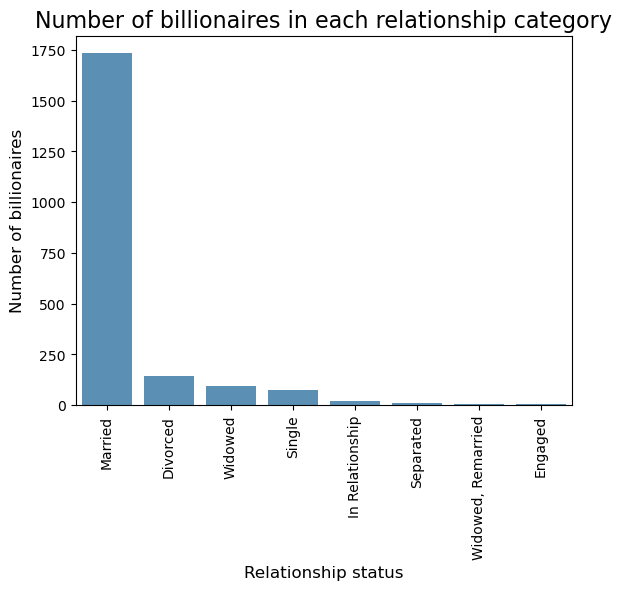

In [80]:
status = df['Status'].value_counts()
sns.barplot(x=status.index, y=status.values, alpha=0.8)
plt.title('Number of billionaires in each relationship category', fontsize=16)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('Relationship status', fontsize=12)
plt.xticks(rotation = 90)
plt.show()

Observation :- The Highest Number of billionaires in each relationship category is **Married**.

### 8. Net Worth of Billionaires by Country?

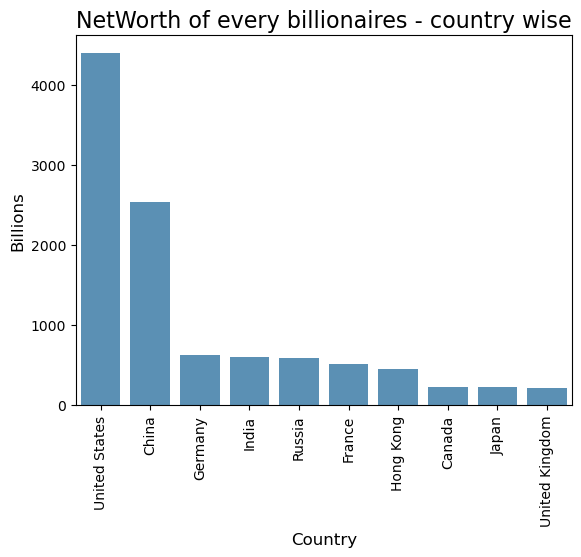

In [82]:
contributed = df.groupby('Country')['NetWorth'].sum().sort_values(ascending = False).head(10)
sns.barplot(x=contributed.index, y=contributed.values, alpha=0.8)
plt.title('NetWorth of every billionaires - country wise', fontsize=16)
plt.ylabel('Billions', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation = 90)
plt.show()

Observation :- The **United States** boasts the highest net worth among billionaires by country.

### 9. Which city has the highest number of billionaires?

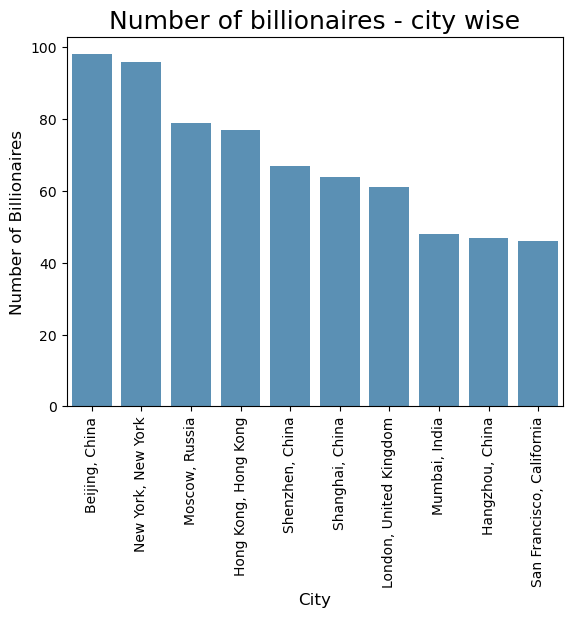

In [84]:
city = df['Residence'].value_counts().head(10)
sns.barplot(x=city.index, y=city.values, alpha=0.8)
plt.title('Number of billionaires - city wise', fontsize=18)
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Observation :- In terms of the highest number of billionaires, **Beijing, China** leads the pack, followed by **Mumbai, India**, which ranks third.

### 10. Number of billionaire families

In [85]:
family = 0
for i in df['Name']:
  j = i.split()
  if j[-1] == 'family':
    family += 1
print('Number of billionaire families: ', family)

Number of billionaire families:  335
